## importing neccessary libraries 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Read the data

In [2]:
df=pd.read_csv('forestfires.csv')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


## Data Preparation 

In [3]:
# Checking for missing values in the dataset
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [4]:
# Checking the data types of each column
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [5]:
# check duplicates
df[df.duplicated()]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
53,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
100,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
215,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
303,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00


In [6]:
# remove duplicates
df.drop_duplicates(inplace = True)
df[df.duplicated()]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area


In [7]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,90.637427,110.989279,549.155166,9.023587,18.887524,44.348928,4.010526,0.021832,12.891598
std,2.320059,1.230925,5.540920,64.191013,247.724594,4.575543,5.828128,16.358803,1.796613,0.297107,63.892586
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,440.900000,6.400000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.540000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Data visulazation

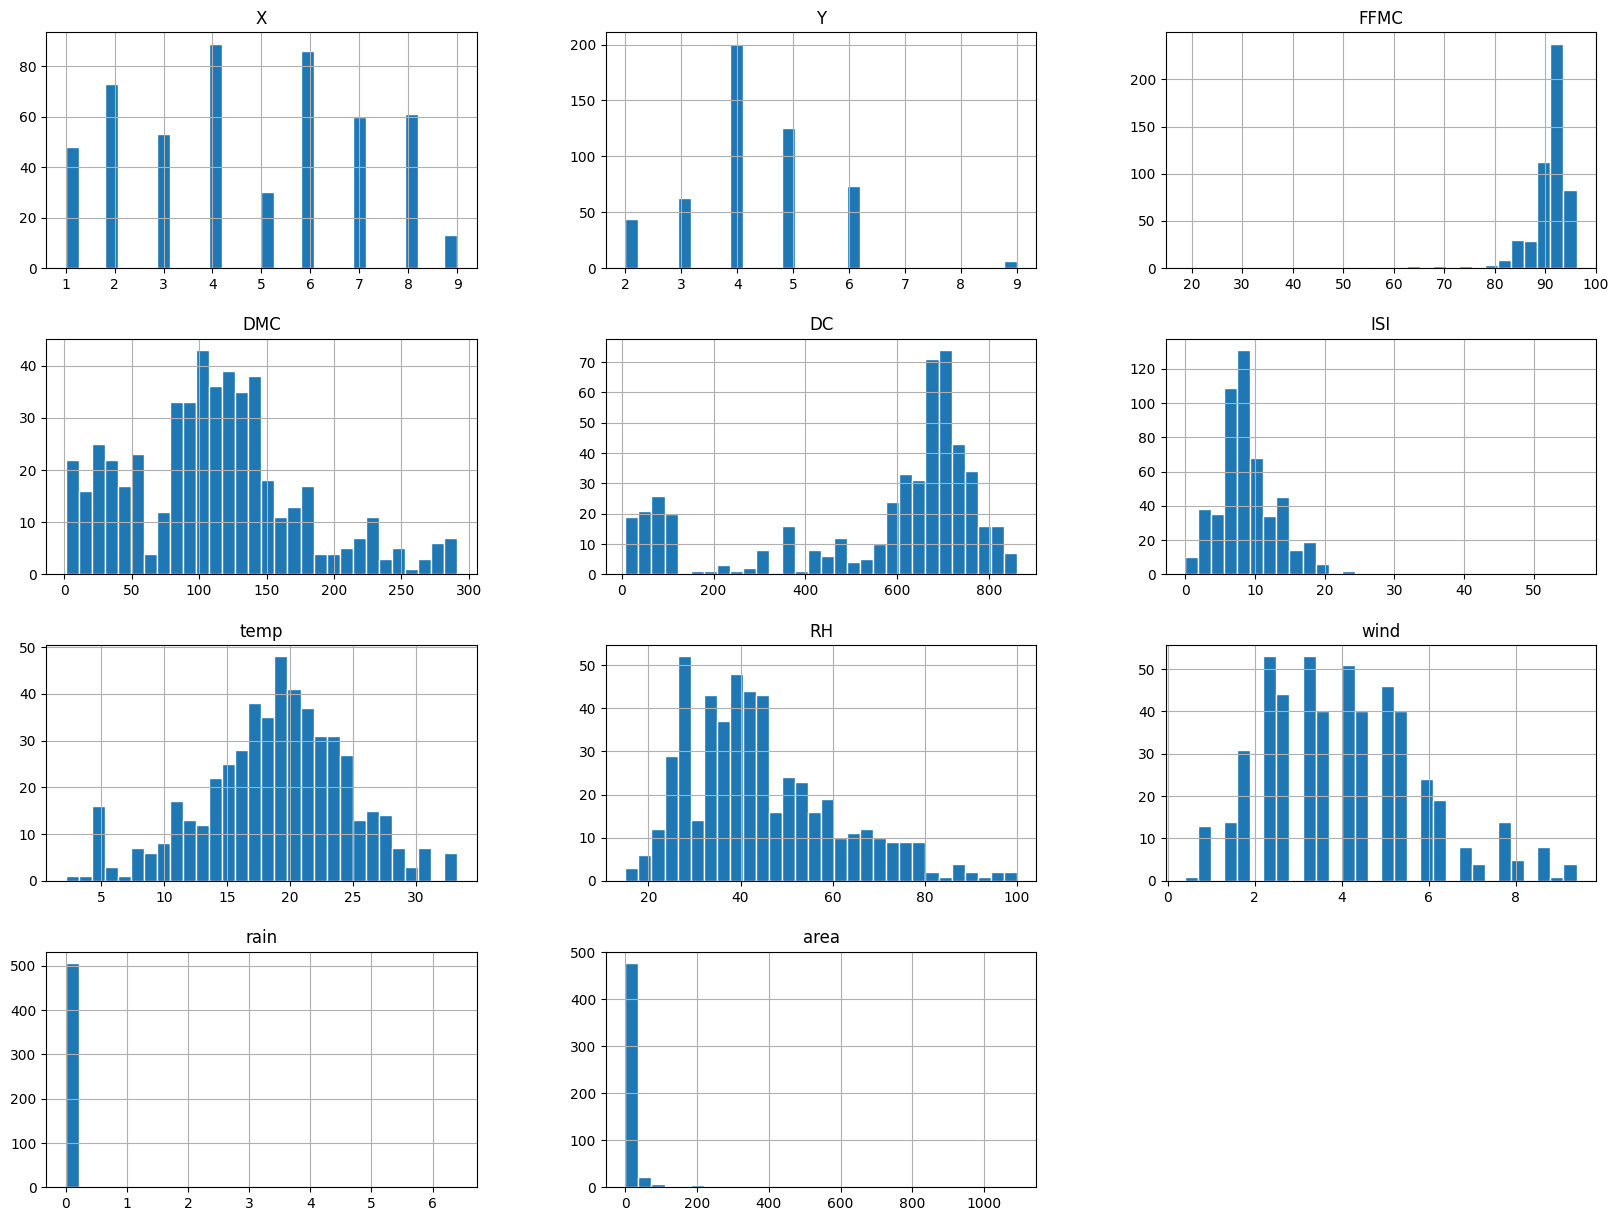

In [8]:
# histogram describtion of the data
plt.figure(figsize=(20,15))
df.hist(ax=plt.gca(),bins=30,ec='w')
plt.show()

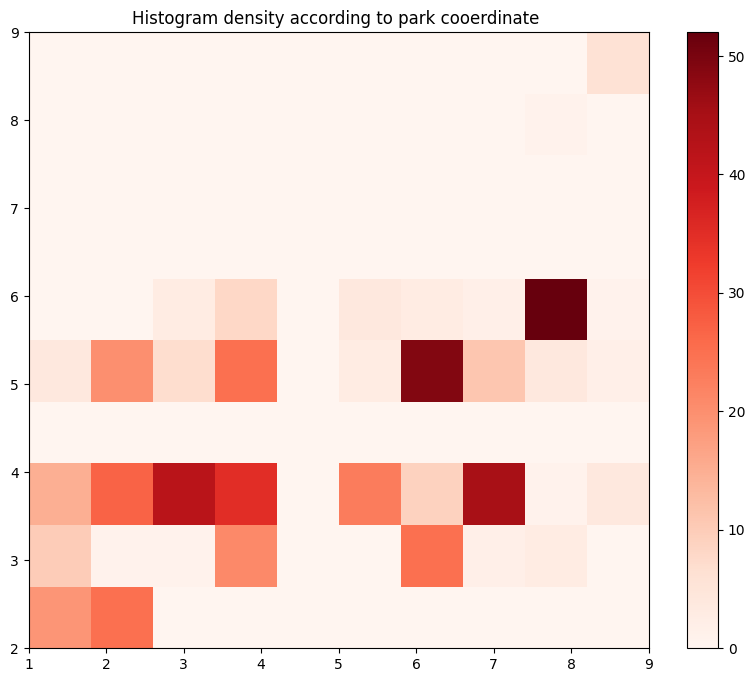

In [9]:
# Histogram density according to park cooerdinate 
plt.figure(figsize=(10, 8))

plt.hist2d(df.X,df.Y,cmap=plt.cm.Reds)
plt.title('Histogram density according to park cooerdinate ')
plt.colorbar()
plt.show()


Text(0.5, 1.0, 'Fire by Months')

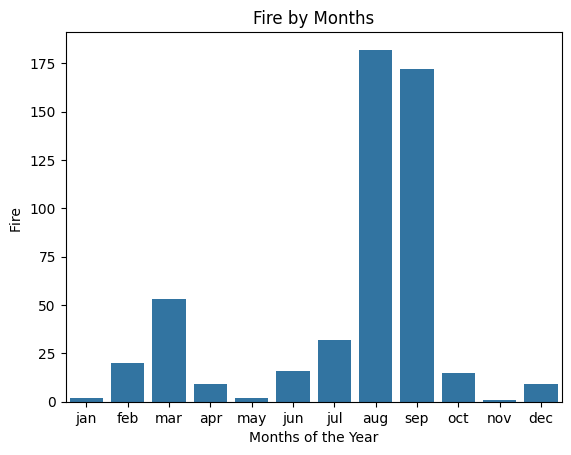

In [10]:
# fire by months
chart=sns.barplot(x=df.month.value_counts().index,y=df.month.value_counts(),order=[ 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
chart.set_xlabel('Months of the Year')
chart.set_ylabel('Fire ')
chart.set_title('Fire by Months')


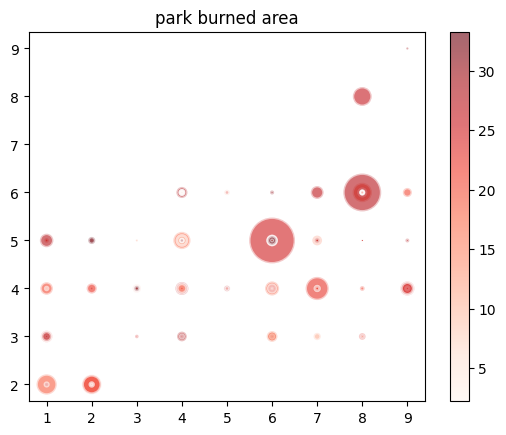

In [11]:
# park burned area
plt.scatter(x= df['X'],y = df['Y'],s=df['area' ],c=df['temp'],cmap="Reds",alpha=0.6,edgecolors="white",linewidth=2)
plt.title('park burned area')
plt.colorbar()
plt.show()

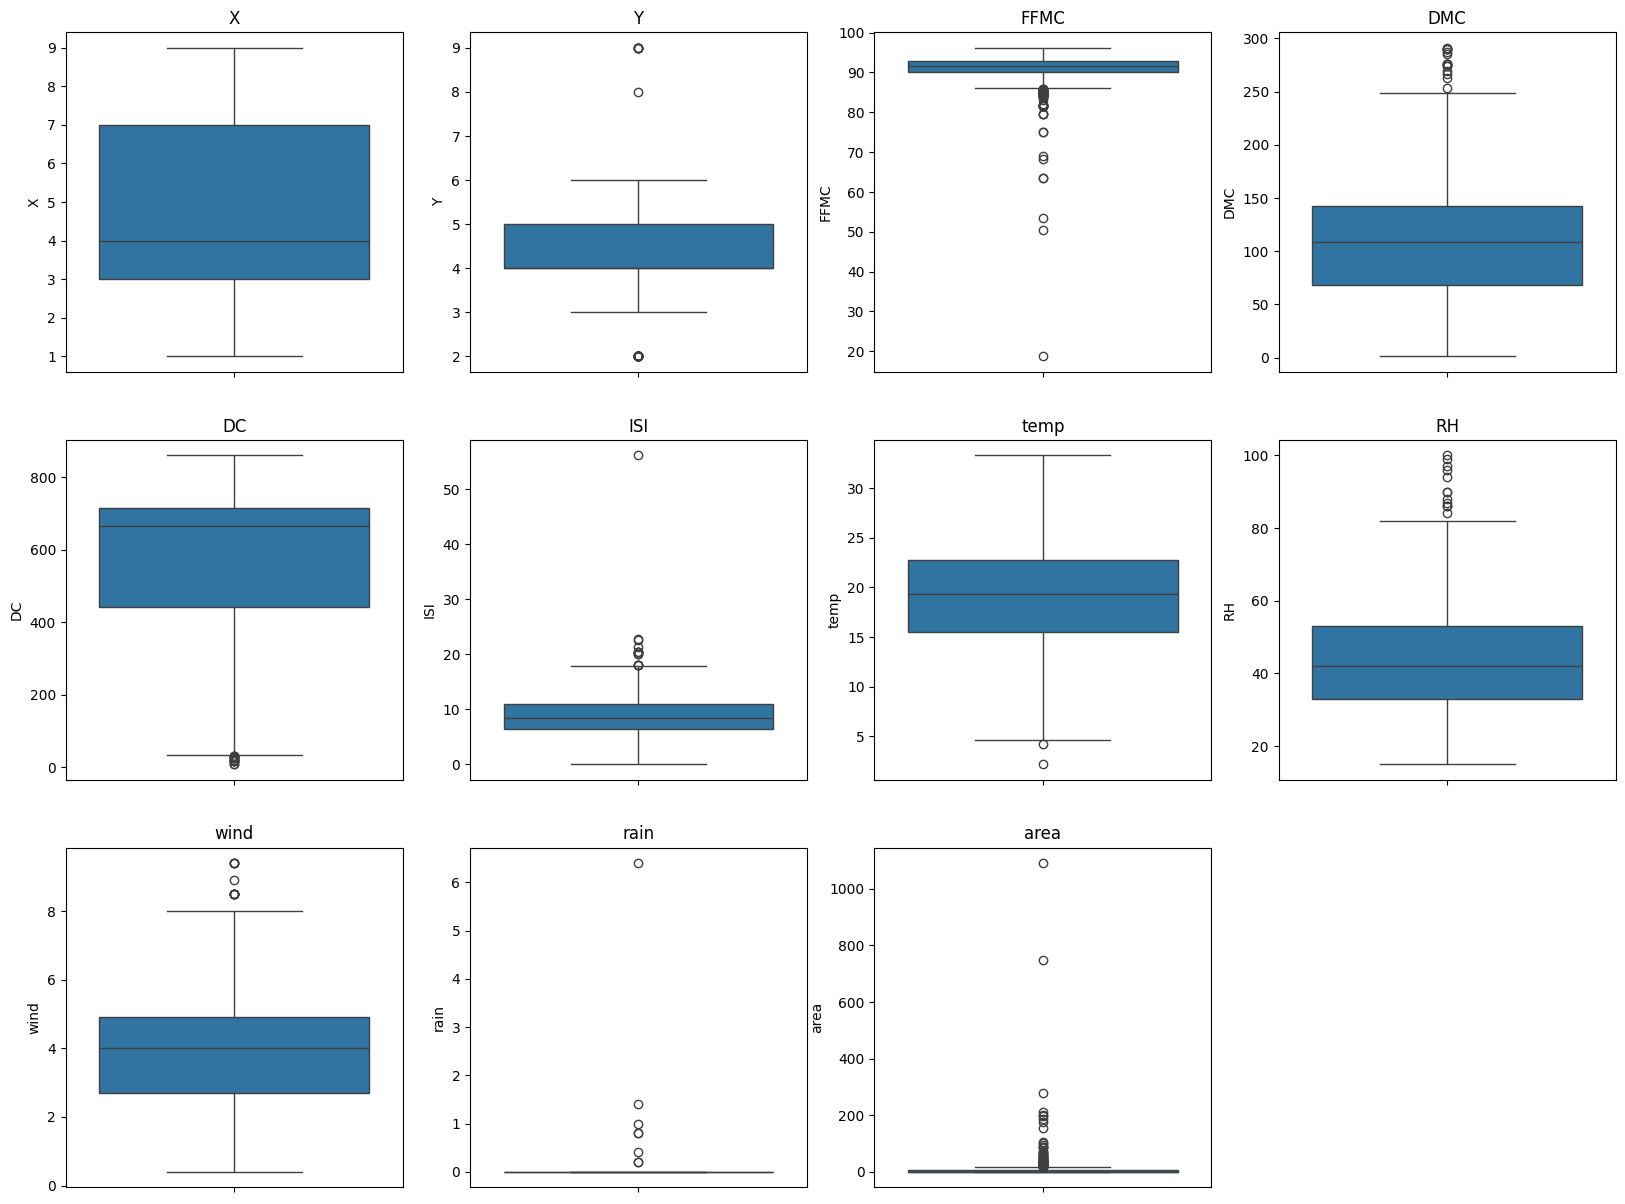

In [12]:
# boxplot of the data
numerical_columns = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain','area']


plt.figure(figsize=(20,15))

for i,column in enumerate(numerical_columns,1):
    plt.subplot(3,4,i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.show()

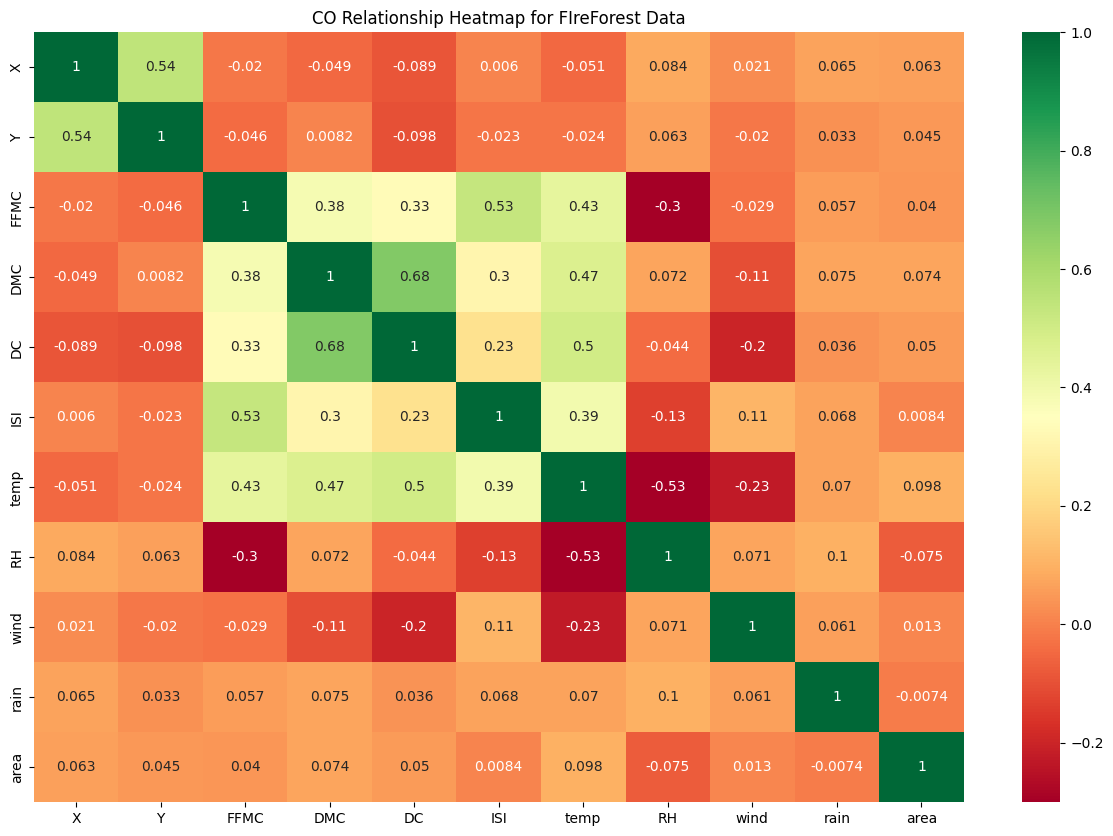

In [13]:
corr=df[numerical_columns].corr()
# Heatmap for coreleation 
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='RdYlGn',robust=True)
plt.title('CO Relationship Heatmap for FIreForest Data') 
plt.show()

In [14]:
# category the fire 
df['area_fire'] = df['area'].apply(lambda x: 'yes' if x > 0.5 else 'no')
df=df.drop(columns=['area'])
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area_fire
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,no
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,no
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,no
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,no
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,yes
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,yes
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,yes
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,no


In [15]:
# count each category
df['area_fire'].value_counts()

area_fire
yes    259
no     254
Name: count, dtype: int64

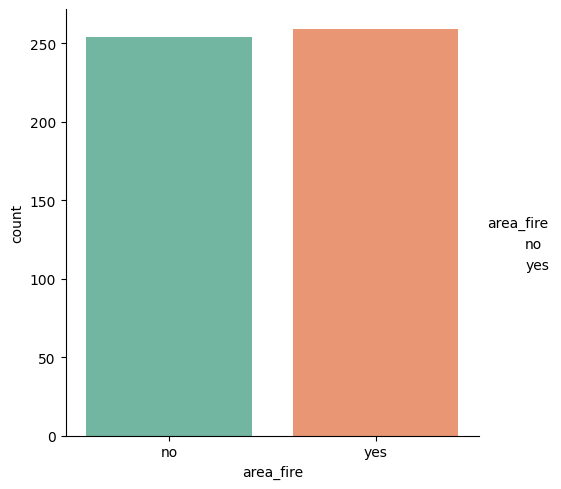

In [16]:
# The visualisation of area_fire
sns.catplot(x="area_fire", kind="count", data=df, palette="Set2")
plt.show()

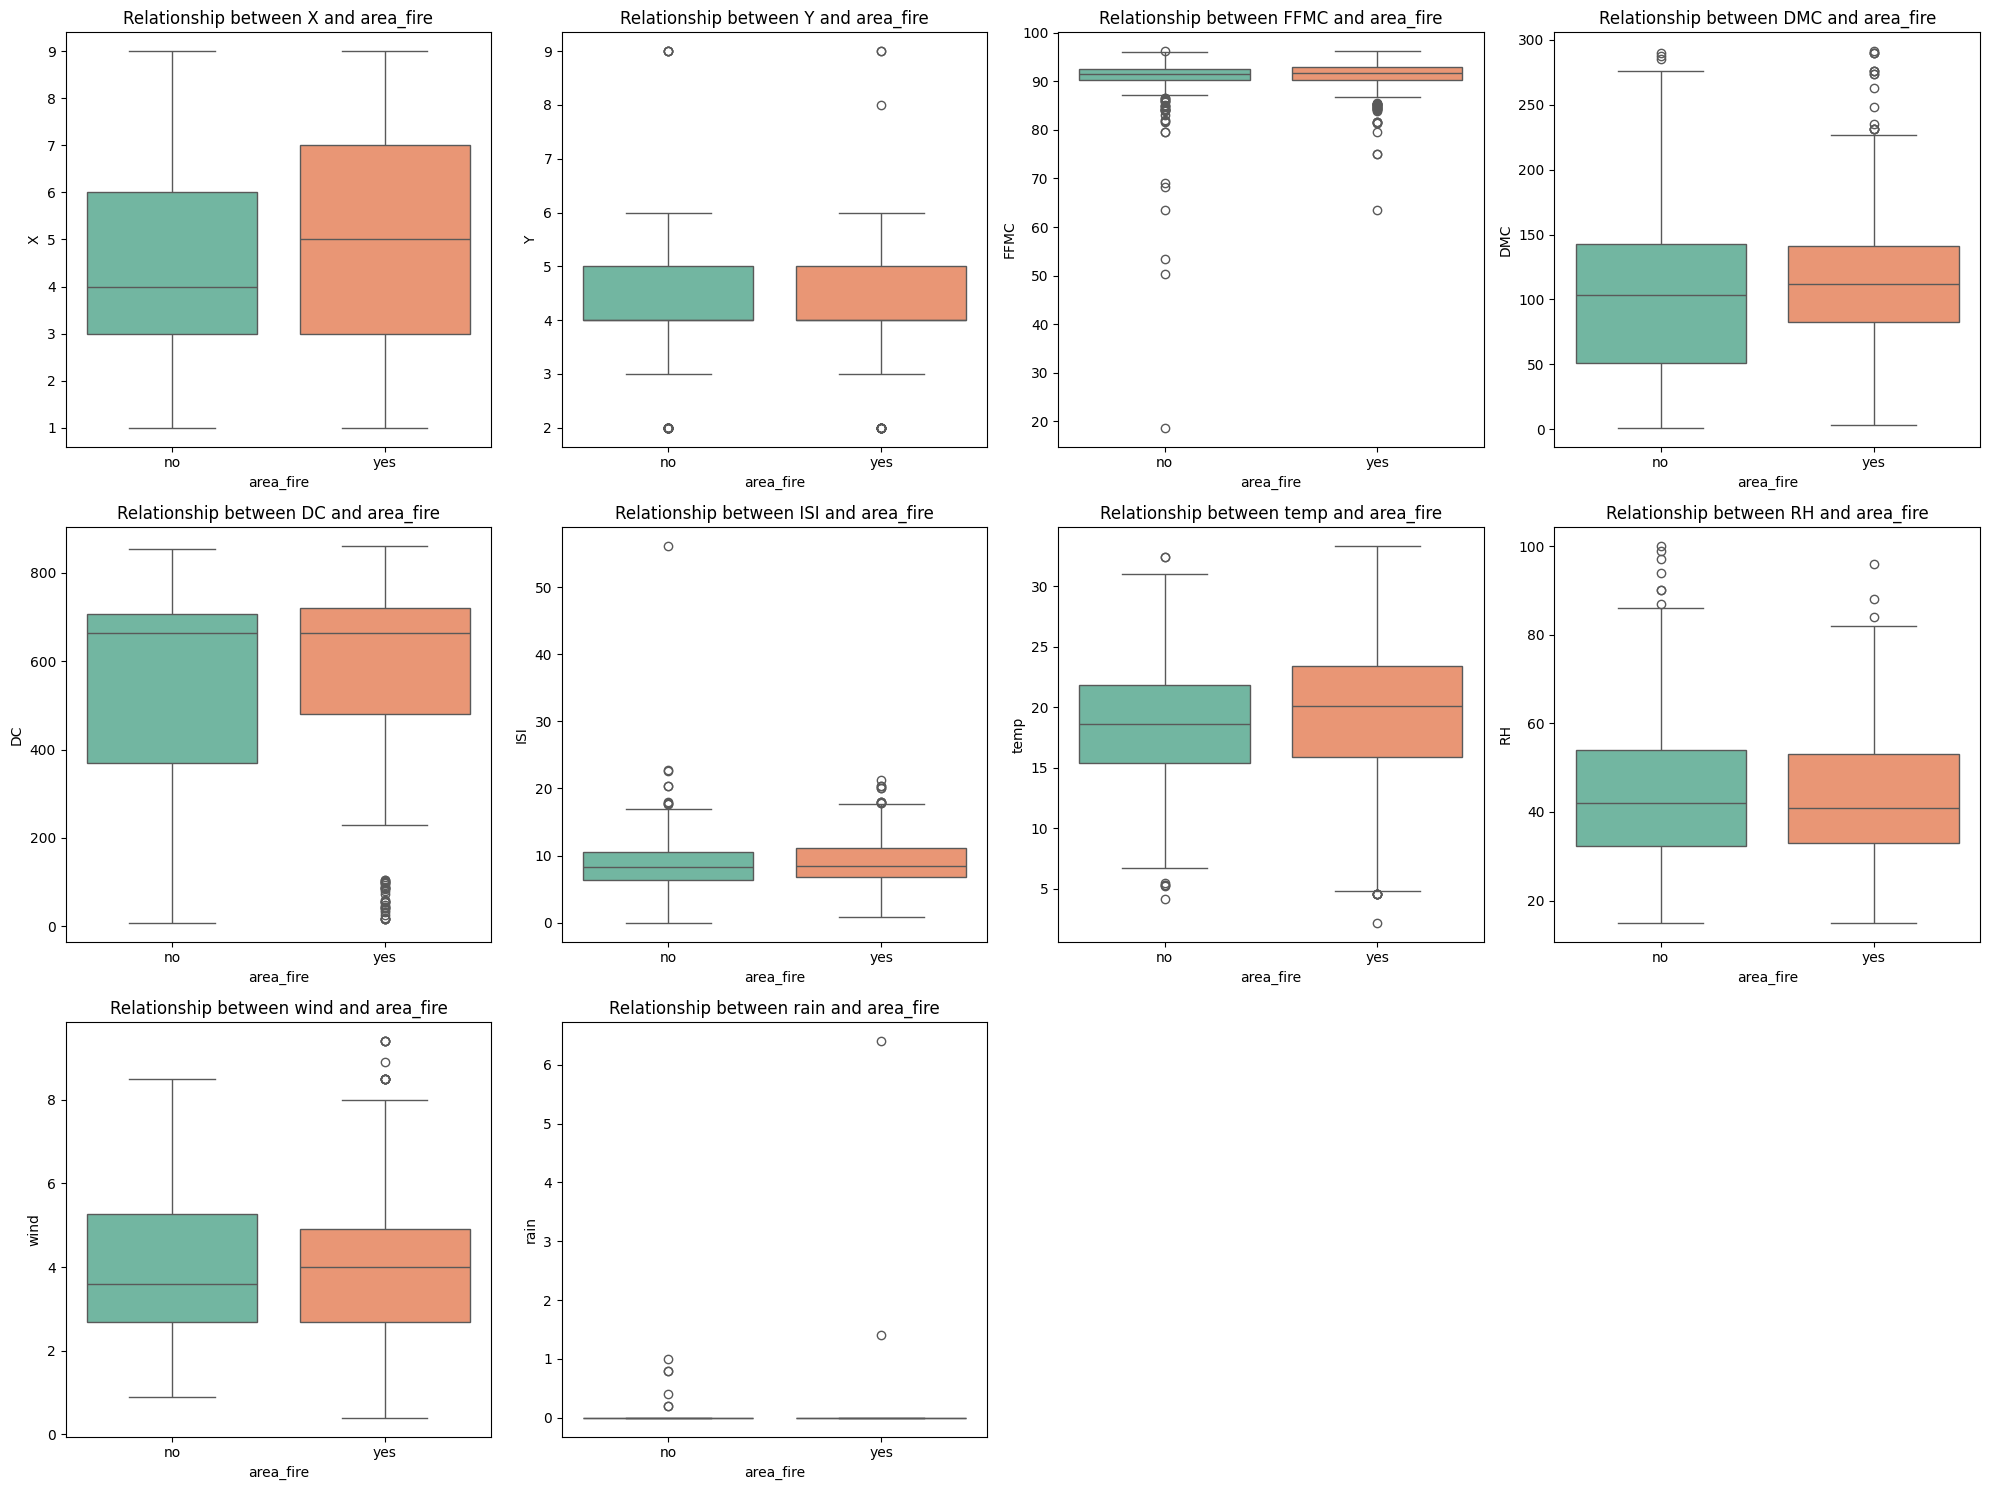

In [17]:
# boxpolt of the data related to area_fire
plt.figure(figsize=(20, 15))

# Numerical variables
numerical_columns =  ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(data=df, x='area_fire', y=column, palette='Set2')
    plt.title(f'Relationship between {column} and area_fire')

plt.tight_layout()
plt.show()

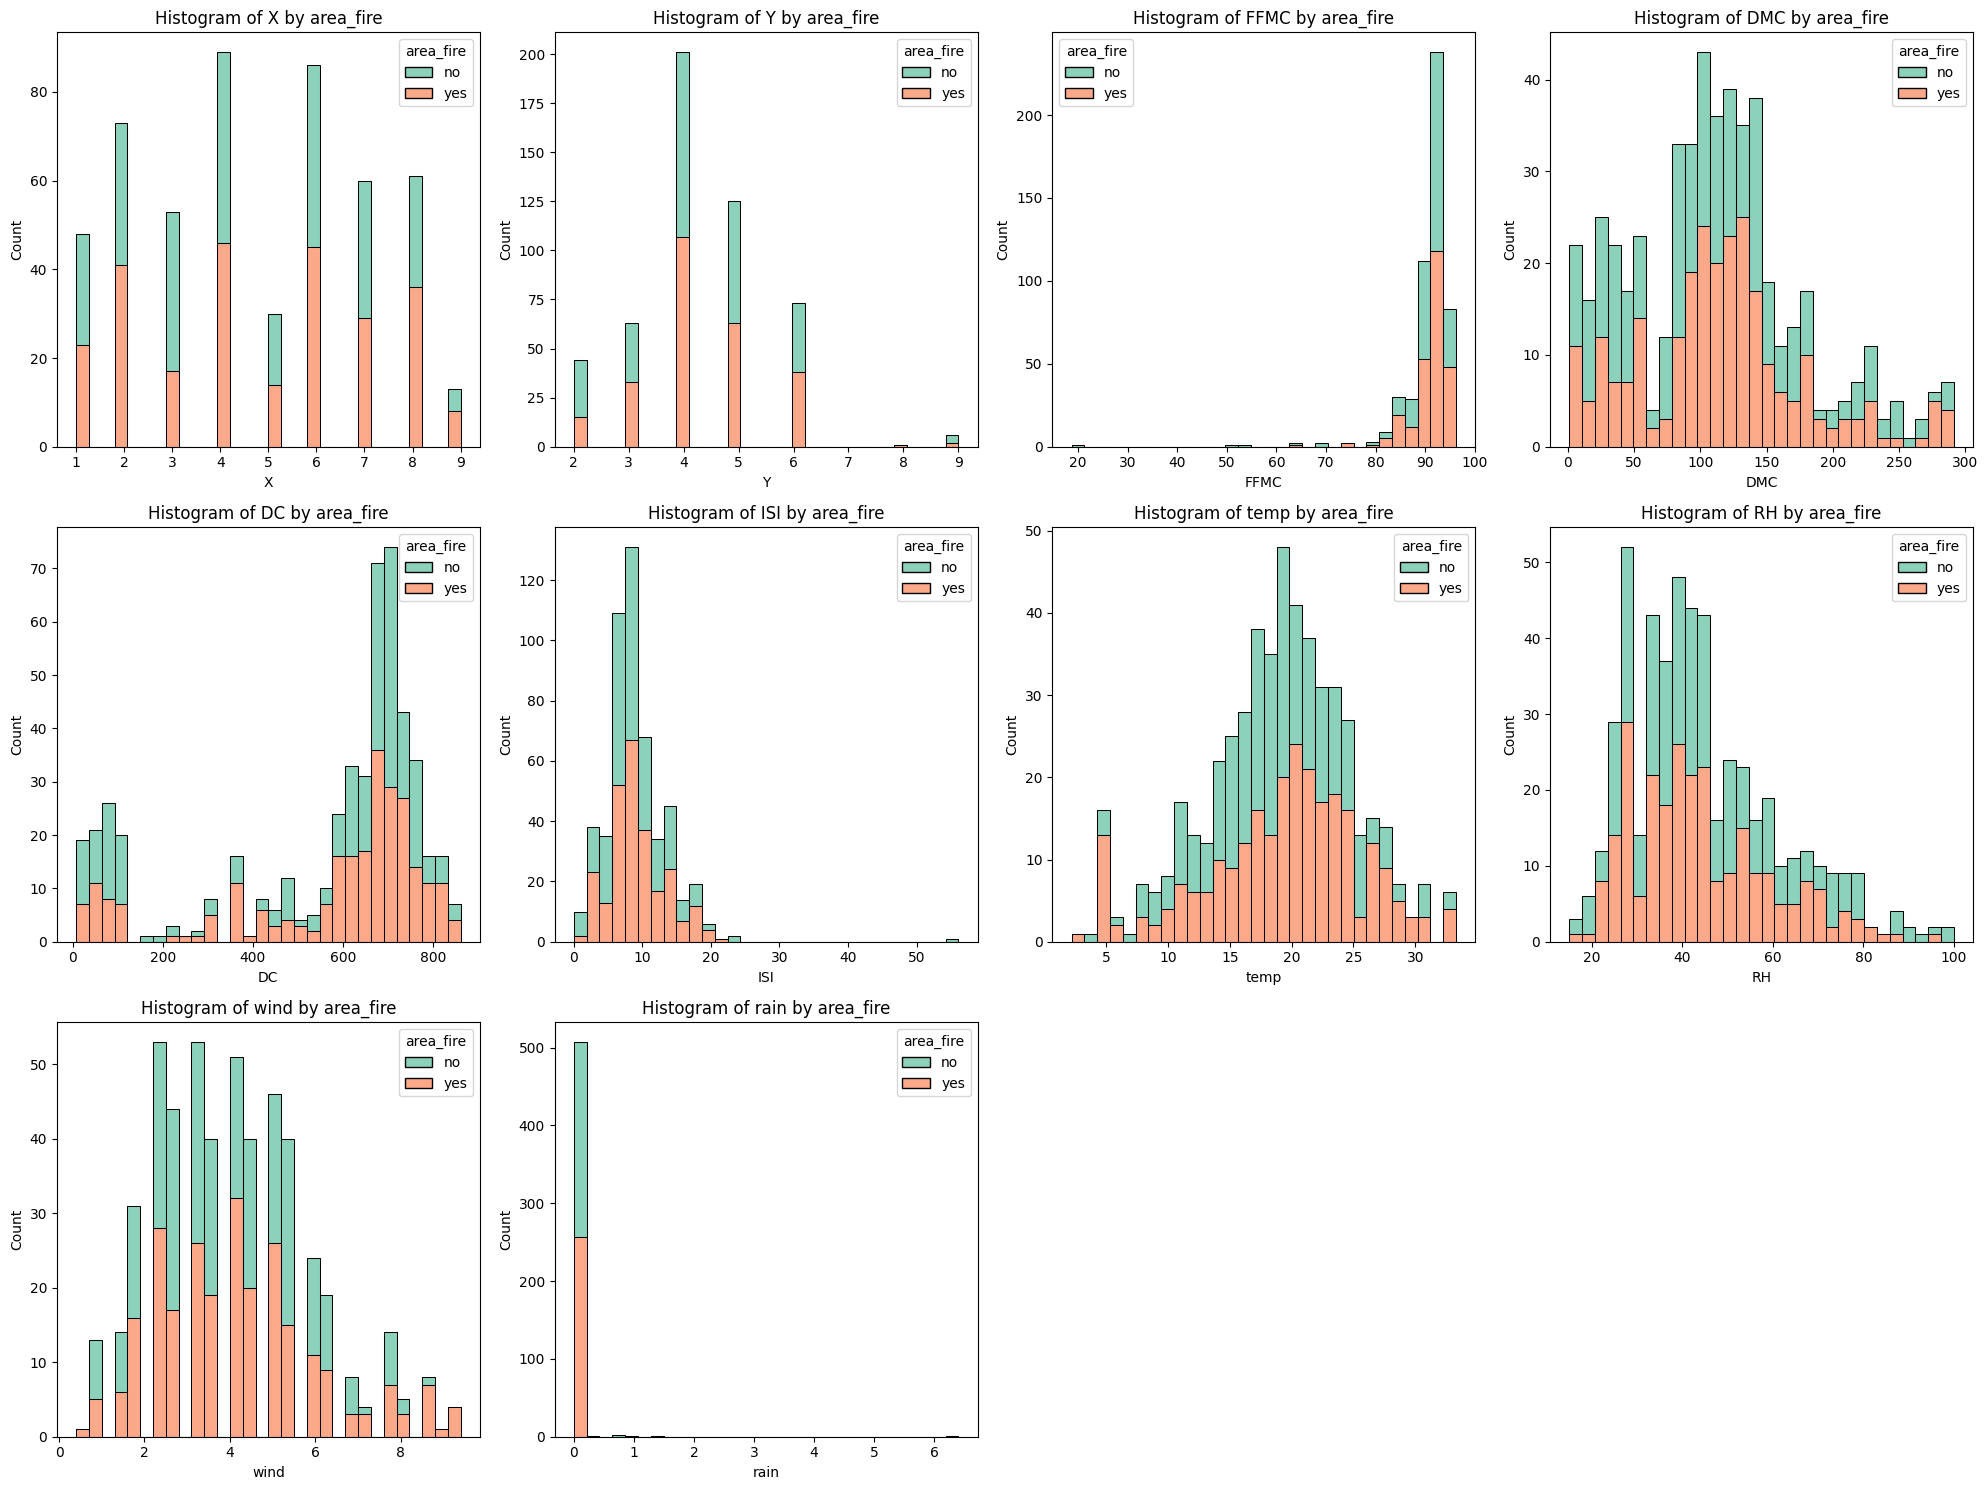

In [18]:
# Numerical variables
numerical_columns = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Plotting histograms
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df, x=column, hue='area_fire', kde=False, bins=30, palette='Set2', multiple='stack')
    plt.title(f'Histogram of {column} by area_fire')
plt.tight_layout()
plt.show()

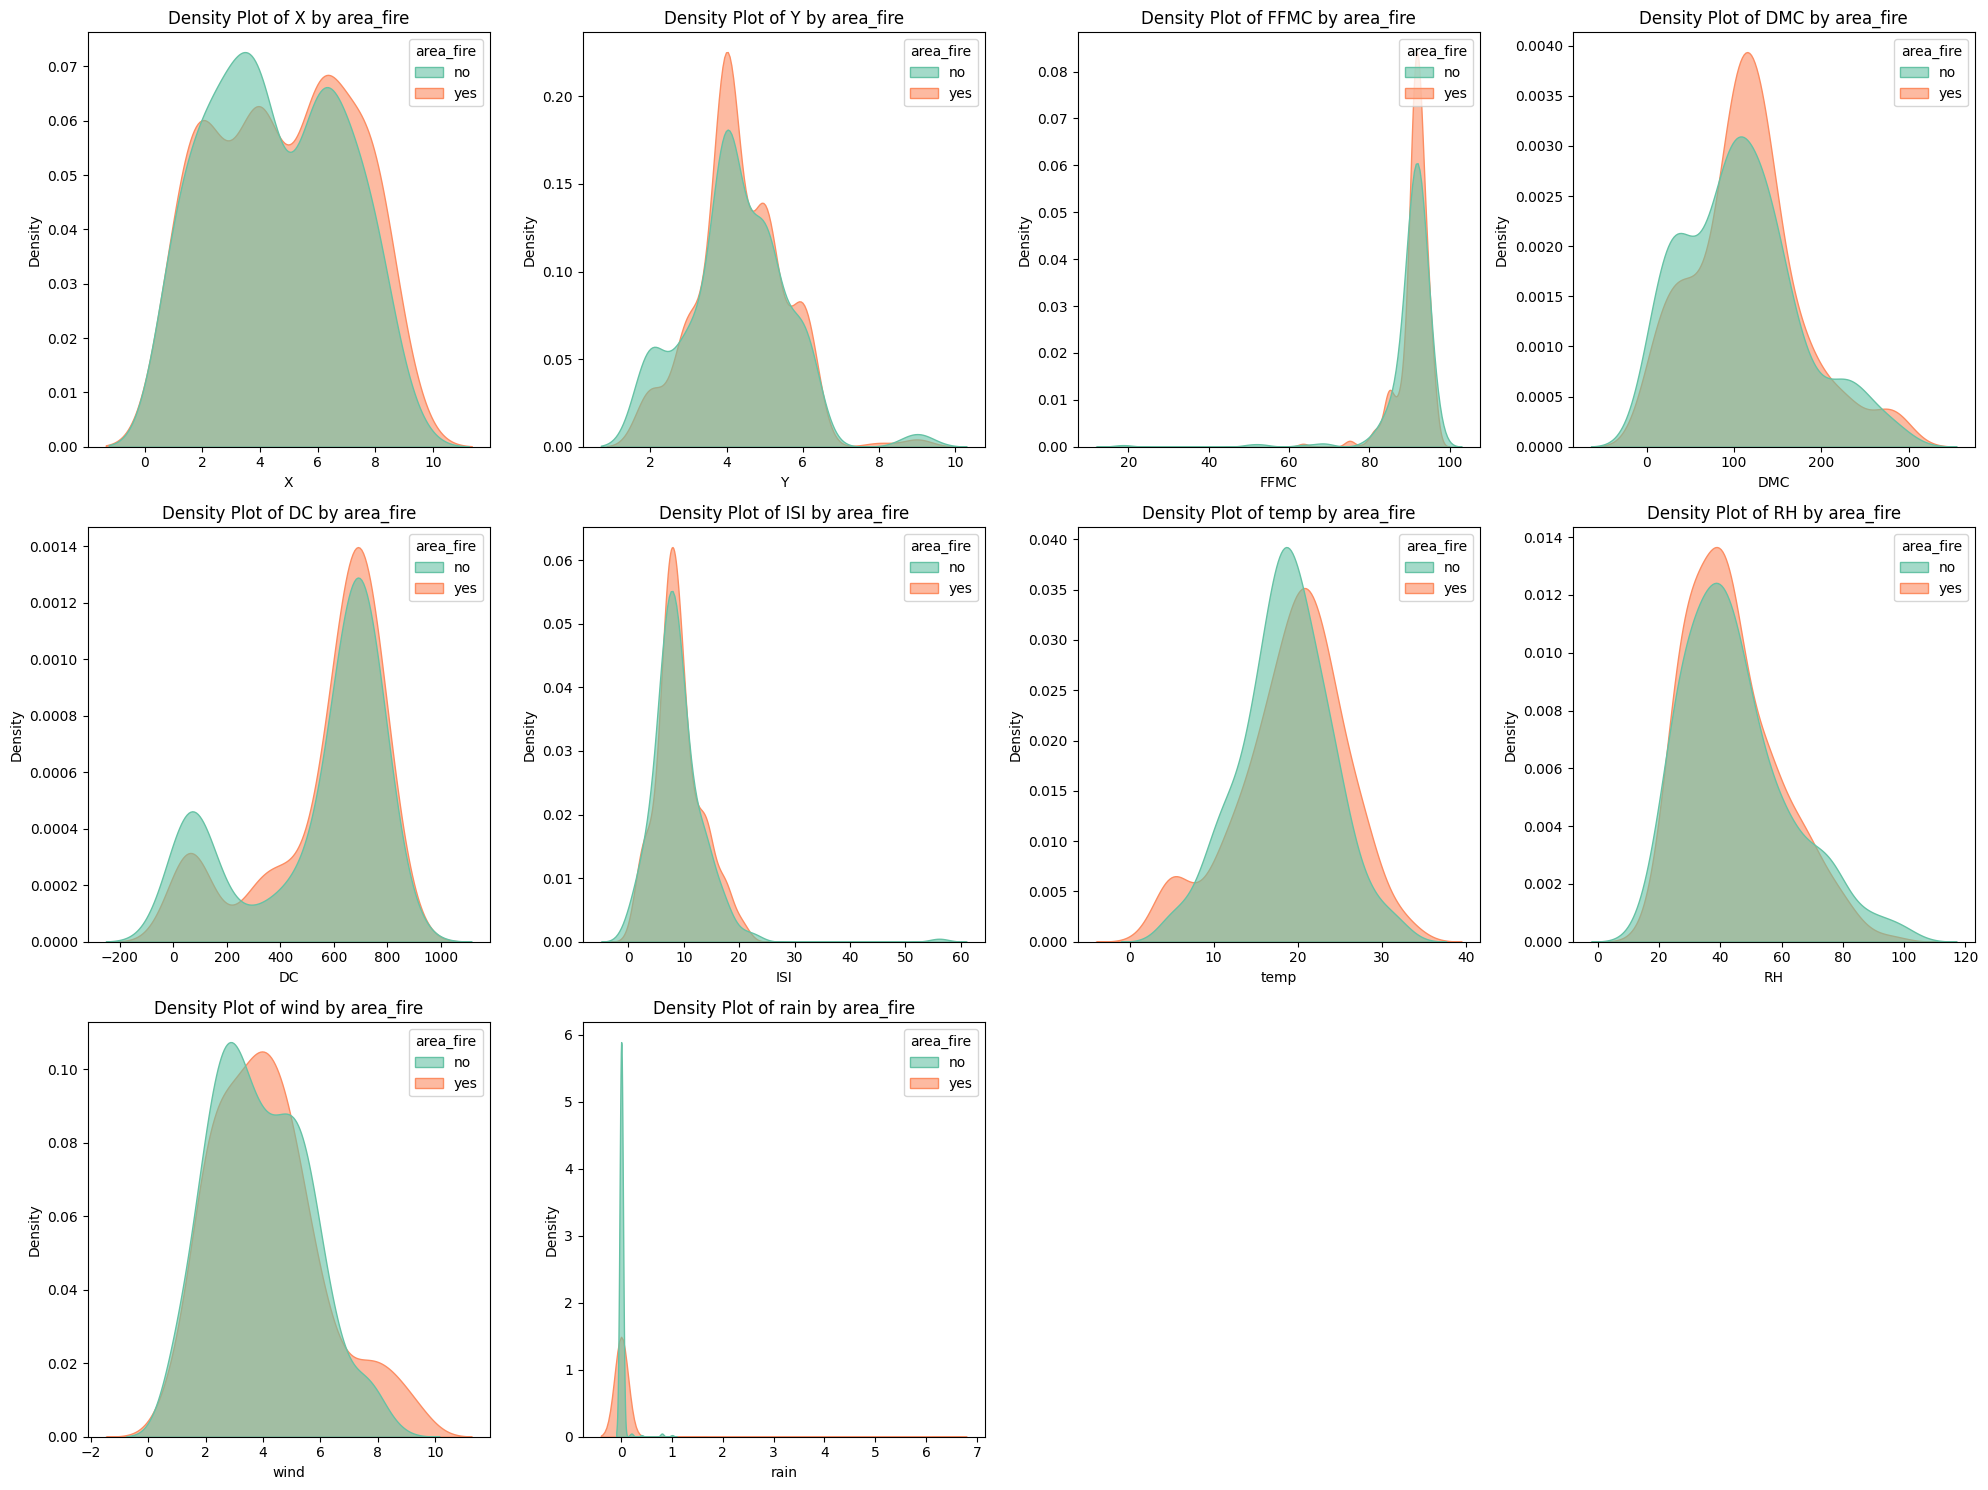

In [19]:
# Plotting density plots
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.kdeplot(data=df, x=column, hue='area_fire', fill=True, palette='Set2', alpha=0.6)
    plt.title(f'Density Plot of {column} by area_fire')
plt.tight_layout()
plt.show()

## Data Preprocessing


In [20]:
# extract features and target 
X = df.drop(['area_fire','day','month'], axis=1)  
# X = df.drop(['area_fire'], axis=1)  

y = df['area_fire']
# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101 )



In [21]:
X

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


In [22]:
y

0       no
1       no
2       no
3       no
4       no
      ... 
512    yes
513    yes
514    yes
515     no
516     no
Name: area_fire, Length: 513, dtype: object

In [23]:
# # feature scalling for the data
# sc = StandardScaler()
sc = MinMaxScaler(feature_range=(0, 1))

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[0.875     , 0.57142857, 0.94967742, ..., 0.2       , 0.65555556,
        0.        ],
       [0.125     , 0.        , 0.94709677, ..., 0.35294118, 0.35555556,
        0.        ],
       [0.625     , 0.42857143, 0.99741935, ..., 0.21176471, 0.45555556,
        0.        ],
       ...,
       [0.125     , 0.        , 0.93419355, ..., 0.18823529, 0.3       ,
        0.        ],
       [0.25      , 0.14285714, 0.9483871 , ..., 0.14117647, 0.3       ,
        0.        ],
       [0.875     , 0.57142857, 0.94451613, ..., 0.42352941, 0.2       ,
        0.        ]])

## Building and evaluating The Models

Accuracy: 0.5048543689320388
Precision: 0.5094339622641509
Recall: 0.5192307692307693
Classification Report:
               precision    recall  f1-score   support

          no       0.50      0.49      0.50        51
         yes       0.51      0.52      0.51        52

    accuracy                           0.50       103
   macro avg       0.50      0.50      0.50       103
weighted avg       0.50      0.50      0.50       103



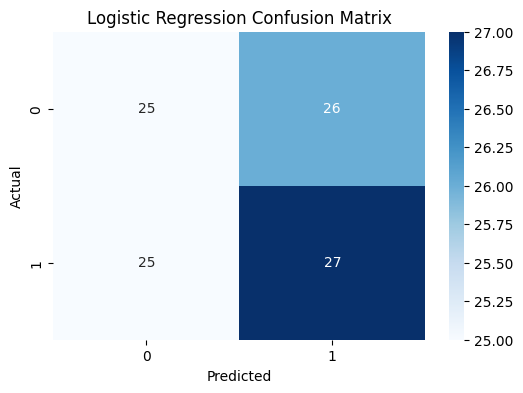

In [25]:
# Logistic Regression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred_lr = classifier_lr.predict(X_test)

# Evaluation for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_lr, pos_label='yes'))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
# Confusion matrix heatmap for Logistic Regression
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.5339805825242718
Precision: 0.5370370370370371
Recall: 0.5576923076923077
Classification Report:
               precision    recall  f1-score   support

          no       0.53      0.51      0.52        51
         yes       0.54      0.56      0.55        52

    accuracy                           0.53       103
   macro avg       0.53      0.53      0.53       103
weighted avg       0.53      0.53      0.53       103



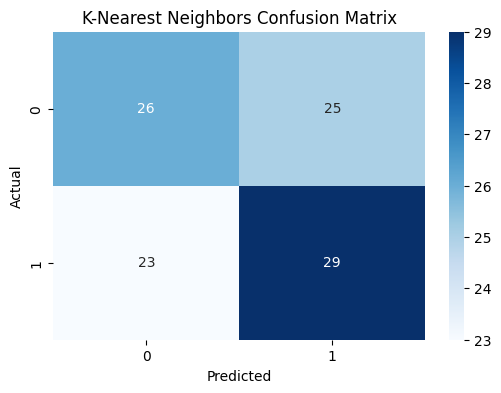

In [26]:
# K-Nearest Neighbors
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)



# Evaluation for K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_knn, pos_label='yes'))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion matrix heatmap for K-Nearest Neighbors
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.5631067961165048
Precision: 0.5507246376811594
Recall: 0.7307692307692307
Classification Report:
               precision    recall  f1-score   support

          no       0.59      0.39      0.47        51
         yes       0.55      0.73      0.63        52

    accuracy                           0.56       103
   macro avg       0.57      0.56      0.55       103
weighted avg       0.57      0.56      0.55       103



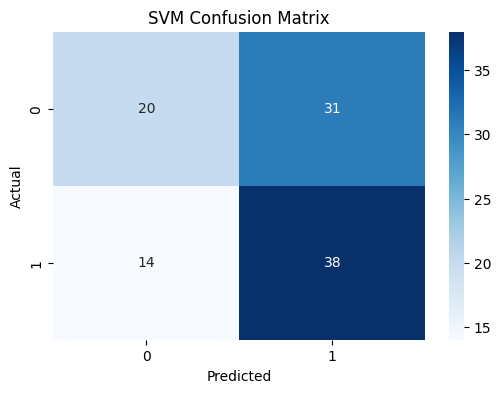

In [27]:
# Support Vector Machine (SVM)
classifier_svm = SVC( )
classifier_svm.fit(X_train, y_train)
y_pred_svm = classifier_svm.predict(X_test)



# Evaluation for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm, pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_svm, pos_label='yes'))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion matrix heatmap for SVM
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.5631067961165048
Precision: 0.5507246376811594
Recall: 0.7307692307692307
Classification Report:
               precision    recall  f1-score   support

          no       0.59      0.39      0.47        51
         yes       0.55      0.73      0.63        52

    accuracy                           0.56       103
   macro avg       0.57      0.56      0.55       103
weighted avg       0.57      0.56      0.55       103



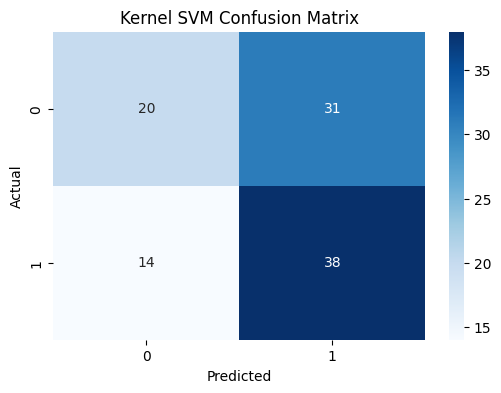

In [28]:
# Kernel SVM
classifier_kernel_svm = SVC(kernel='rbf')
classifier_kernel_svm.fit(X_train, y_train)
y_pred_kernel_svm = classifier_kernel_svm.predict(X_test)


# Evaluation for Kernel SVM
cm_kernel_svm = confusion_matrix(y_test, y_pred_kernel_svm)
print("Accuracy:", accuracy_score(y_test, y_pred_kernel_svm))
print("Precision:", precision_score(y_test, y_pred_kernel_svm, pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_kernel_svm, pos_label='yes'))
print("Classification Report:\n", classification_report(y_test, y_pred_kernel_svm))

# Confusion matrix heatmap for Kernel SVM
plt.figure(figsize=(6, 4))
sns.heatmap(cm_kernel_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Kernel SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.5145631067961165
Precision: 1.0
Recall: 0.038461538461538464
Classification Report:
               precision    recall  f1-score   support

          no       0.50      1.00      0.67        51
         yes       1.00      0.04      0.07        52

    accuracy                           0.51       103
   macro avg       0.75      0.52      0.37       103
weighted avg       0.75      0.51      0.37       103



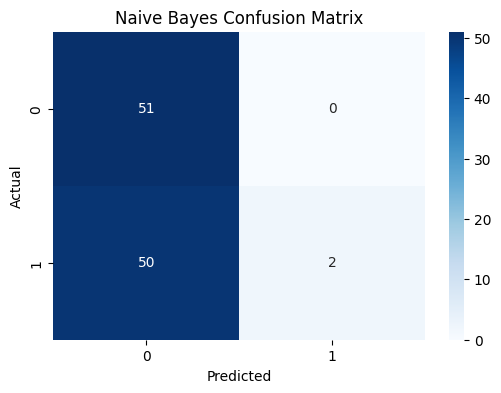

In [29]:
# Naive Bayes
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)


# Evaluation for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_nb, pos_label='yes'))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion matrix heatmap for Naive Bayes
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.6116504854368932
Precision: 0.6071428571428571
Recall: 0.6538461538461539
Classification Report:
               precision    recall  f1-score   support

          no       0.62      0.57      0.59        51
         yes       0.61      0.65      0.63        52

    accuracy                           0.61       103
   macro avg       0.61      0.61      0.61       103
weighted avg       0.61      0.61      0.61       103



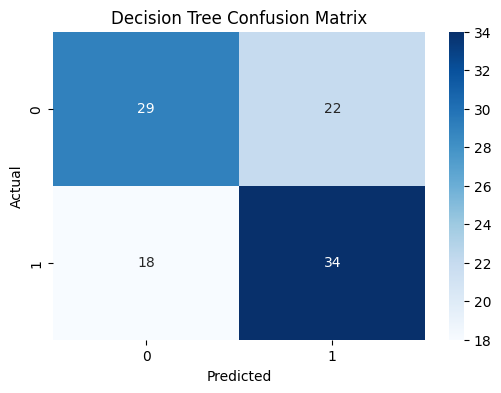

In [30]:
# Decision Tree
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)


# Evaluation for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_dt, pos_label='yes'))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion matrix heatmap for Decision Tree
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.5436893203883495
Precision: 0.5490196078431373
Recall: 0.5384615384615384
Classification Report:
               precision    recall  f1-score   support

          no       0.54      0.55      0.54        51
         yes       0.55      0.54      0.54        52

    accuracy                           0.54       103
   macro avg       0.54      0.54      0.54       103
weighted avg       0.54      0.54      0.54       103



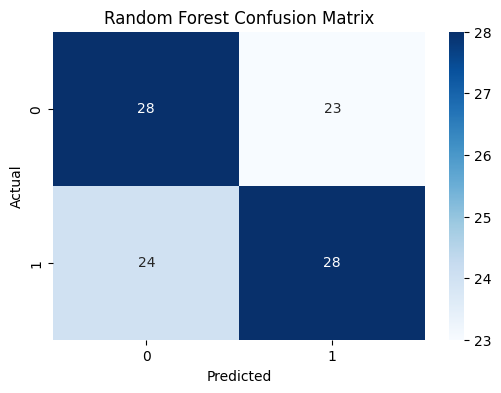

In [31]:
# Random Forest
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)


# Evaluation for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, pos_label='yes'))
print("Recall:", recall_score(y_test, y_pred_rf, pos_label='yes'))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix heatmap for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
1

1